In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('/home/jessica/Documents/Udemy_ML_Course/Project_3_Predict_Sales_of_Product_using_Time_Series-20220825T093524Z-001/Project_3_Predict_Sales_of_Product_using_Time_Series/perrin-freres-monthly-champagne-.csv')

In [6]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
df.shape

(107, 2)

In [9]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [11]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [12]:
df.drop(105,axis=0,inplace=True)

In [13]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [14]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [16]:
df.set_index('Month',inplace=True) #Make the month my index

In [17]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [18]:
df.describe() #Summary of the data

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

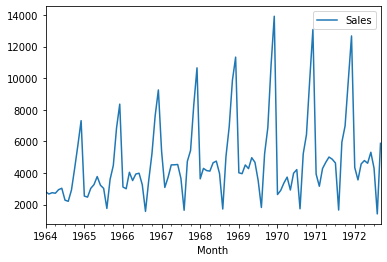

In [20]:
df.plot()

In [21]:
#looking this graph,we can say this data is seasonal
#(seasonal is all about suppose in each yr in christmas sales goes up) and then down

In [22]:
# we plot,whether test is stationary or not, stationary do not change with the time
#if not stationery then how to make it stationery

In [24]:
!pip install statsmodels

     |████████████████████████████████| 9.8 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 4.3 MB/s eta 0:00:01


In [25]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [26]:
test_result=adfuller(df['Sales'])

In [51]:
#adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
#most imp is p-value
#this is almost similar to Hypothesis testing,whereas Null hypo which says Data is not Stationery
#whereas Alternate hypo says data is stationery



In [27]:
test_result

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [28]:
###if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is true,ie data is stationery
##pvalue=0.3639157716602417

In [33]:

#zip basically combines result,labels

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [34]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [35]:
#if our data is non-stationery,we have to make it stationery using various techniques such as Differencing & many more

## Differencing

In [36]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [37]:
df['Sales'].shift(1) #muevo sales una fila mas abajo

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [40]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1) #resta entre el anterior 

In [41]:
#why taken shift(12),bcz basically year has 12 month cycle
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [42]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [43]:
## Again test dickey fuller test on df['Sales First Difference']
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [44]:
#now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo
#ie data is stationery
#if p-value is almost 0,then we have a wonderful stationery graph

<AxesSubplot:xlabel='Month'>

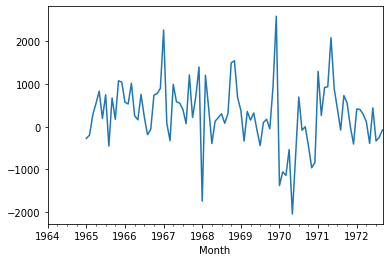

In [45]:
df['Seasonal First Difference'].plot()

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Autocorrelation(plot_acf),Partial Autocorrelation(plot_pacf)

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

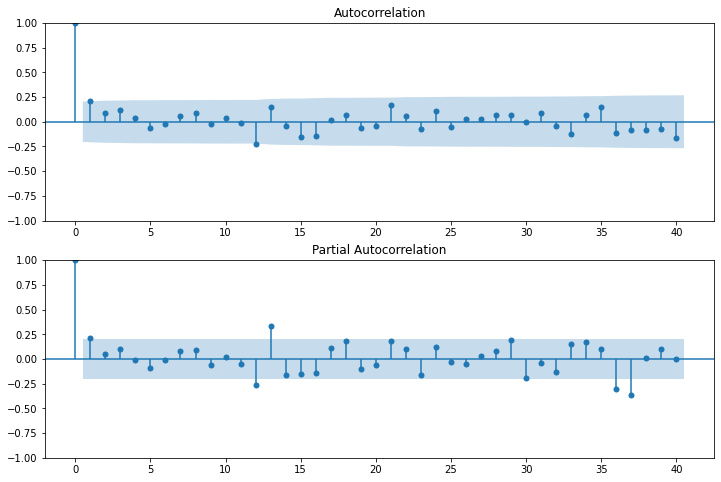

In [50]:
#Correlation between one data and the next one, 1=100 correlation with 100
#good values for correlation <0.1, where my q=3 or 4
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

x   x.Shift(1)   Diff    there is a relation, but if I do shift two, and there is no relation I set d=2

100   0           0
101   100         1
102   101         1
      102

In [57]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model  import ARIMA

In [58]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/home/jessica/ENTER/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/jessica/ENTER/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/jessica/ENTER/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 26 Aug 2022   AIC                           1911.627
Time:                        22:33:33   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

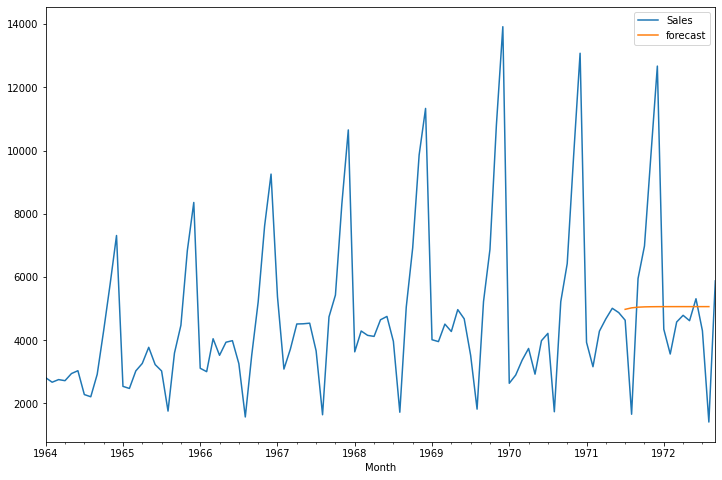

In [61]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True) #prediction not good because it is stationary data
df[['Sales','forecast']].plot(figsize=(12,8))

In [62]:
## note: when u have seasonal data, use SARIMAX over there..

In [63]:
import statsmodels.api as sm

In [64]:
#seasonal_order=(1,1,1,12)
#(p,d,q,shift_value)

In [65]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/home/jessica/ENTER/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/jessica/ENTER/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99458D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05907D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18407D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.06411D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.32980D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [66]:
#predicting from index 90 to 103
df['forecast']=results.predict(start=90,end=103,dynamic=True)


<AxesSubplot:xlabel='Month'>

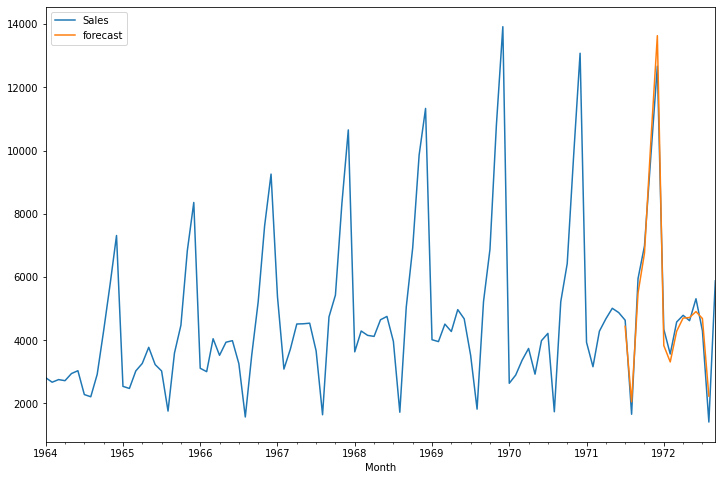

In [67]:
#blue line is original data anf orange is a forecasted data
df[['Sales','forecast']].plot(figsize=(12,8))

In [68]:
### to see how future predictions/projections looks like

In [69]:
from pandas.tseries.offsets import DateOffset

In [70]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [71]:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [72]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [73]:
from pandas.tseries.offsets import DateOffset

#creating additional dataset for 24 months,
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [74]:
future_datset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [77]:
future_datset_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [80]:
future_df=pd.concat([df,future_datset_df])

In [81]:
#then we can see future predictions

<AxesSubplot:>

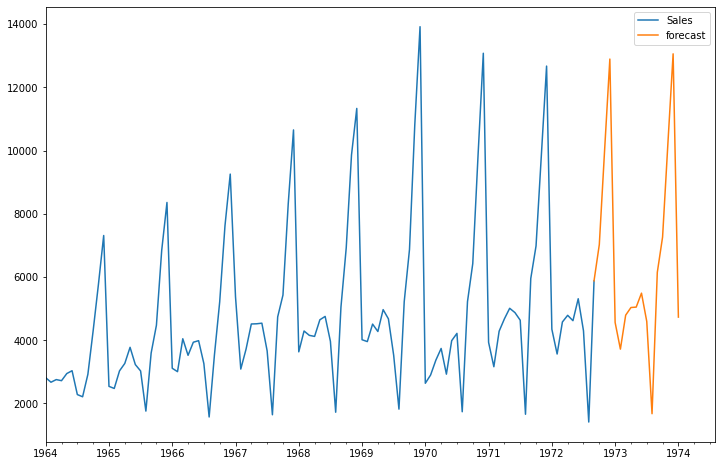

In [82]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 